## Biological Signals Analysis - Week 5 Homework Part 1 - SVD

### Due: Feb. 14, 2024

### Table of Contents:
- Math Questions about SVD
- Image Reconstruction using Singular Value Decomposition (SVD)
- Record Your Observations

### Math Questions about SVD

Let $A = U\Sigma V^T \in \mathbb{R}^{m \times n}$

where:

- The $i^{th}$ columns of $U$ and $V$ , respectively, are $u_i$ and $v_i$
- The $i^{th}$ largest singular value of $A$ is $\sigma_i$.
- The number of nonzero singular values of $A$ is $r$.

**Question 1:** Prove that the rank of $A$, $\text{rank}(A)$, is equal to $r$, the number of its nonzero singular values. 

$A \in \mathbb{R}^{m \times n}$ can be decomposed into 3 matrices:

- $U$ is an $m \times m$ matrix, where the columns are orthogonal vectors of $A$'s column space.
- $V^T$ is the transpose of an $n \times n$ matrix, $V$, where the columns are orthogonal vectors of $A$'s row space.
- $\Sigma$ (Sigma)  is a diagonal matrix diagonal matrix with singular values $\sigma_1, \sigma_2, ..., \sigma_p$ on the diagonal ($p = \min(m,n)$), where the first $r$ singular values are positive ($\sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r > 0$) and the rest are zero.


$\text{rank}(A) = \text{dim}(\text{Col}(A))$, where $\text{Col}(A)$ represents the column space of $A$. This corresponds to the maximum number of linearly independent columns of $A$.



$\text{rank}(\Sigma) = r$ because it has $r$ nonzero entries on its diagonal, which are linearly independent.

For orthogonal matrices $U$ and $V$, $\text{rank}(U\Sigma V^T) = \text{rank}(\Sigma)$ since orthogonal transformations preserve linear independence and vector space dimensions.

Therefore, $\text{rank}(A) = \text{rank}(\Sigma) = r$

Suppose we need to solve the linear system of equations $Ax \approx b$ in the least squares sense. Namely, we wish to minimize $\|b - Ax\|_2^2$.

**Question 2:** Prove that $x_{LS} = V\Sigma^{\dagger}U^Tb = A^{\dagger}b$, where $Q^{\dagger}$ denotes the pseudo-inverse of $Q$.

To prove that $x_{LS} = V\Sigma^{\dagger}U^Tb = A^{\dagger}b$, where $Q^{\dagger}$ denotes the pseudo-inverse of $Q$, we'll utilize the properties of Singular Value Decomposition (SVD).

Given that $A = U \Sigma V^T$ is the singular value decomposition of $A$, where $U$ and $V$ are orthogonal matrices and $Sigma$ is a diagonal matrix containing the singular values of $A$, we can express the pseudo-inverse $A^{\dagger}$ as $A^{\dagger}$ =$V\Sigma^{\dagger}U^T$, where $Sigma^{\dagger}$ is obtained by taking the reciprocal of non-zero singular values in $Sigma$ and transposing the result.

Now, let's start by expressing the least squares solution $x_{LS}$:

$ x_{LS} = \text{argmin}_x \|b - Ax\|_2^2 $

Expanding the expression and taking its derivative with respect to $x$ to find the minimum, we have:

$
\begin{aligned}
\frac{\partial \|b - Ax\|_2^2}{\partial x} &= \frac{\partial (b - Ax)^T(b - Ax)}{\partial x} \\
&= \frac{\partial (b^Tb - 2b^TAx + x^TA^TAx)}{\partial x} \\
&= -2A^Tb + 2A^TAx
\end{aligned}
$

Setting the derivative equal to zero to find the minimum, we get:

$
2A^TAx = 2A^Tb
$

Dividing both sides by 2 and multiplying by $A^TA^{-1}$ (assuming $A^TA$ is invertible), we get:

$
x = (A^TA)^{-1}A^Tb = A^{\dagger}b
$

Therefore, $x_{LS} = A^{\dagger}b$.

This is equivalent to the expression $x_{LS} = V\Sigma^{\dagger}U^Tb$ because $A^{\dagger} = V\Sigma^{\dagger}U^T$. 

Hence, $x_{LS} = V\Sigma^{\dagger}U^Tb$.


### Image Reconstruction using Singular Value Decomposition (SVD)

In this exercise, you will explore the impact of SVD rank on image reconstruction. You will select an image from the kaggle dataset you've already downloaded last week, and apply SVD with various ranks to reconstruct the image. This process will help you understand the balance between compression (lower storage) and image quality.

#### Instructions

##### 1. Select an Image
First, select an image from the dataset to work with.

##### 2. Apply SVD with Different Ranks
Apply Singular Value Decomposition (SVD) to the selected image with the following ranks: `3, 10, 20, 50, 100`.

For each specified rank, reconstruct the image using only the top-k singular values and vectors. You can do this by modifying the S matrix to zero out all but the top-k singular values and then performing matrix multiplication to get the reconstructed image.

In [ ]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from skimage import io
import cv2


image = cv2.imread(r"image_for_anal.png")

if len(image) and image.shape[2]== 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else: 
    gray_image= image

U, s, V = linalg.svd(gray_image)
num_of_ranks = [3,10,20,50,100]

plt.figure(figsize=(8,4))
plt.imshow(gray_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
for idx, curr_rank in enumerate(num_of_ranks):
    curr_sigmas = s.copy()
    curr_sigmas[curr_rank:]=0
    S= linalg.diagsvd(curr_sigmas,U.shape[1],V.shape[1])
    approx_image= U @ S @ V
    plt.figure(figsize=(8,4))
    plt.imshow(approx_image, cmap = 'gray')
    plt.title('Rank {}'.format(curr_rank))
    plt.axis('off')
    if curr_rank == 50:
        constructed_image = approx_image

plt.tight_layout()


### Record Your Observations

After reconstructing the images with different ranks, observe and note how the choice of rank affects the reconstruction. Consider the following:

How does the image clarity change with increasing rank?
At which rank do you observe the best balance between noise reduction and image detail?

The higher the rank used in the approximation, the closer the result is to the original image, and the image clarity is better.
On the other hand,at lower rank, only essential features of the image show up.

I think at rank 50 best balance between noise reduction and image detail is achieved.

### Choose the Best Rank

Based on your observations, select a rank that you believe offers the best trade-off between noise, storage, and image quality. This rank does not necessarily have to be one of the ranks you previously computed. Reconstruct the image at this rank and explain why you chose it, considering factors like storage implications and visual fidelity. Record your observations.

In [ ]:
plt.figure(figsize=(8,4))
plt.imshow(constructed_image, cmap = 'gray')
plt.title('Chosen Rank 50')
plt.axis('off')

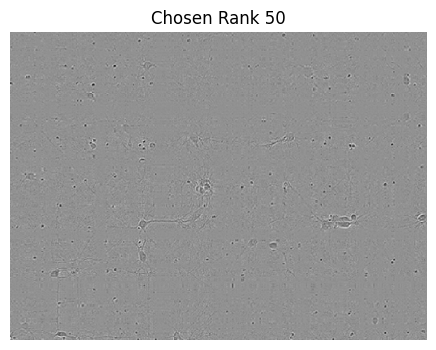

I chose a rank of 50 because it provides a good balance between noise reduction, storage efficiency, and image quality.

Noise Reduction: By choosing a rank of 50, I observed that the low-rank approximation effectively reduces noise in the image while preserving its essential features. Higher ranks may further reduce noise, but the marginal improvement is not significant compared to the increase in computational complexity and storage requirements.

Storage Efficiency: A rank of 50 allows for significant compression of the image while retaining satisfactory visual fidelity. The storage implications of higher ranks become increasingly prohibitive without substantial improvements in image quality.

Visual Fidelity: Reconstructing the image at this rank demonstrates that important visual details are preserved, making it suitable for practical applications where storage and computational resources are limited.